# Quantitative Data Analysis



In [3]:
# libraries that we need
import pandas as pd
import nltk
from nltk.text import Text
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import numpy as np
from scipy.stats import chi2_contingency
import csv

In [4]:
# LOAD THE INPUT FILE DH_CollectingData2022_review.tsv 
input_file = 'phrases_dataset.tsv'

## Exploring the dataset.


In [5]:
# opening the file using pandas and storing it into a dataframe 
dataset = pd.read_csv(input_file, delimiter="\t", quoting=csv.QUOTE_NONE, header=None)
dataset.columns =['sentence', 'score']
dataset

,sentence,score
0,"For Nik, he only wants to silence the cacophon...",0.0
1,"""I can play this two ways",0.0
2,"Mild, because it isn't conclusive, and doesn't...",-1.0
3,You can also get some more information about t...,0.0
4,"Soon, Hero, who has never had friends, is thru...",0.0
...,...,...
385,August is torn by his actions but he absolutel...,0.0
386,Heroine Elise Benton is witty in the present d...,0.0
387,I am glad there will be a part three,1.0
388,"Sometimes while they were in a lesson, the wol...",0.0


In [20]:
#printing column names
#column names "Sentence" and "Score" were added to the tsv file to deffirentiate between the two columns
#otherwise the file wasn't loading correctly 
print(dataset.columns)


Index(['sentence', 'score'], dtype='object')


In [21]:
#storing both columns in a dataframe 
target_data = dataset[['sentence','score']]

## The column "Score" shows numbers between (-1 to 1). 
-1 = negative emotion,  0 = neutral emotion, 1 = positive emotion 
  



In [22]:
#Count how many sentences with positive emotions
positive_emotion = dataset[(dataset.score == 1)] 
positive_emotion 

,sentence,score
5,I did like Steven (or Stephen? I listened to t...,1.0
6,The plot is quick moving and the action is vio...,1.0
7,Loved everything about this book,1.0
9,"Great, quick read",1.0
10,"Although there isn't character development, as...",1.0
...,...,...
374,"Good little read, quirky meets mystery and the...",1.0
380,"Coming off of Paula Hawkins's new release, I c...",1.0
382,He's able to take important themes and write a...,1.0
387,I am glad there will be a part three,1.0


In [23]:
#Count how many sentences with negative emotions
negative_emotion = dataset[(dataset.score == -1)] 
negative_emotion

,sentence,score
2,"Mild, because it isn't conclusive, and doesn't...",-1.0
12,Going in I really liked it but unfortunately l...,-1.0
14,I'm not giving this 5 stars because the big re...,-1.0
17,eh I hate how the author made Duke from a nice...,-1.0
21,I guess I didn't track this on goodreads when ...,-1.0
...,...,...
346,"And by the time I got to the conclusions, I di...",-1.0
352,These writing qualities may echo her very expe...,-1.0
376,But it felt forced in other places and the pre...,-1.0
379,Certain revelations from the first book are la...,-1.0


In [24]:
#Count how many sentences with neutral emotions
neutral_emotion = dataset[(dataset.score == 0)] 
neutral_emotion 

,sentence,score
0,"For Nik, he only wants to silence the cacophon...",0.0
1,"""I can play this two ways",0.0
3,You can also get some more information about t...,0.0
4,"Soon, Hero, who has never had friends, is thru...",0.0
8,What happened to the sorceress to make her hat...,0.0
...,...,...
383,I try to say this in a way that does not defer...,0.0
384,Her only mother that she knew dies and her rea...,0.0
385,August is torn by his actions but he absolutel...,0.0
386,Heroine Elise Benton is witty in the present d...,0.0


## Task 1.1

Formulating a hypothesis

H1: Given the dataset, a possible valid hypotheis is that when the word "love" is used in a sentence it is associated with score of 1.0 (positive emotion) rather than it is associated with a score of -1.0 (a negative emotion).

H0 = There is no difference in the presence of the word "love", between sentences where the score is 1.0 and sentences where the socre is -1.0.

## Tokenize sentences

In [25]:
#tokenizing column sentence to be able to count the word "love"
tt_lower_case = TweetTokenizer(preserve_case=False)

# Apply tokenizer to a Pandas Dataframe, and store the results in a new column with a specific name
target_data['tokenized_lowercase'] = target_data['sentence'].apply(tt_lower_case.tokenize)
target_data = target_data.copy()
target_data

,sentence,score,tokenized_lowercase
0,"For Nik, he only wants to silence the cacophon...",0.0,"[for, nik, ,, he, only, wants, to, silence, th..."
1,"""I can play this two ways",0.0,"["", i, can, play, this, two, ways]"
2,"Mild, because it isn't conclusive, and doesn't...",-1.0,"[mild, ,, because, it, isn't, conclusive, ,, a..."
3,You can also get some more information about t...,0.0,"[you, can, also, get, some, more, information,..."
4,"Soon, Hero, who has never had friends, is thru...",0.0,"[soon, ,, hero, ,, who, has, never, had, frien..."
...,...,...,...
385,August is torn by his actions but he absolutel...,0.0,"[august, is, torn, by, his, actions, but, he, ..."
386,Heroine Elise Benton is witty in the present d...,0.0,"[heroine, elise, benton, is, witty, in, the, p..."
387,I am glad there will be a part three,1.0,"[i, am, glad, there, will, be, a, part, three]"
388,"Sometimes while they were in a lesson, the wol...",0.0,"[sometimes, while, they, were, in, a, lesson, ..."


## Generating the contigency matrix

In [26]:
# create a dataframe with only the 1 (Positive sentiment) rows

pos = target_data.loc[target_data['score'] == 1]


# Select only the values in that column
pos_messages_tokenized = pos['tokenized_lowercase']
pos_messages_tokenized_values = pos_messages_tokenized.values.tolist()


# Check if there are messages that contains the token 'love'
pos_w_word = ['TRUE' for msg in pos_messages_tokenized_values if 'love' in msg]

# Check messages that do not contain the token 'love' - store the outcome in a list

pos_not_word = ['TRUE' for msg in pos_messages_tokenized_values if 'love' not in msg]

In [27]:
# Create a dataframe with only the -1 (Negative sentence) rows

not_pos = target_data.loc[target_data['score'] == -1]


# Select only the values in that column
not_pos_messages_tokenized = not_pos['tokenized_lowercase']
not_pos_messages_tokenized_values = not_pos_messages_tokenized.values.tolist()


# Check if there are messages that contains the token 'love'
not_pos_w_word = ['TRUE' for msg in not_pos_messages_tokenized if 'love' in msg]

# Check messages that do not contain the token 'love'
not_pos_not_word = ['TRUE' for msg in not_pos_messages_tokenized_values if 'love' not in msg]

In [28]:
#the data stored in the 4 different lists

data4contingency = [] #counting how many elements each list contains

#the observed frequencies are stored in 4 different lists
data4contingency.append(len(pos_w_word))     #positive sentiment with word "love"
data4contingency.append(len(not_pos_w_word)) #positive sentiment without word "love"
data4contingency.append(len(pos_not_word))   #negative sentiment with word "love"
data4contingency.append(len(not_pos_not_word))   #negative sentiment without word "love"

#printing the counts of each list
print('The values:')
print(data4contingency)

# We transform the list in a contingency matrix
data_cm = np.array(data4contingency).reshape(2,-1)

print('The contingency matrix')
print(data_cm)


The values:
[10, 3, 170, 59]
The contingency matrix
[[ 10   3]
 [170  59]]


## Analyzing the probabilistic correlation using Chi Square

There is no correlation between sentences containing the word love and being a positive sentiment. It happens because the number of positive sentences without the word love is higher than the number of sentences that contains the word love.

In [29]:
from scipy.stats import chi2 as c2 #scipy.stats library which provides us with chi2_contingency() function to implement Chi-square test.
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(data_cm)

print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

#if p_value is higher than 0.05 then we will accept the null hypothesis 
#this test is to see if there is a relation between the said variables or not
if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

0.0 1.0
These are the expected frequencies
[[  9.66942149   3.33057851]
 [170.33057851  58.66942149]]
The observed differences are not statiscally significant - H1 is rejected


## Task 1.2 

## Pos-tagger

In [30]:
# Importing libs and setting the nltk package
from nltk import pos_tag
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Raya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [31]:
# Getting the dataset sentences and pos tagging them
#tokens is the list of words and pos_tag() returns a list of tuples with each
sentences_list = dataset['sentence'].tolist()
pos_tagged = []
for text in sentences_list:
  sentence = sent_tokenize(text)
  for token in sentence:
    words = nltk.word_tokenize(token)
    tagged = nltk.pos_tag(words)
  pos_tagged.append(tagged)

In [32]:
# Calculating the number of NOUNS and ADJECTIVES
# Setting the list of NOUNS and ADJECTIVES from the following website
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
nouns_list = ["NN","NNS","NNP","NNPS"]
adj_list = ["JJ","JJR","JJS"]
num_nouns = []
num_adj = []
for sentence in pos_tagged:
  num_nouns_msg = 0
  num_adj_msg = 0
  for tag in sentence:
    if tag[1] in nouns_list:
      num_nouns_msg += 1
    elif tag[1] in adj_list:
      num_adj_msg += 1
  num_nouns.append(num_nouns_msg)
  num_adj.append(num_adj_msg)

dataset["nouns_frequency"] = num_nouns
dataset["adjective_frequency"] = num_adj

dataset

,sentence,score,nouns_frequency,adjective_frequency
0,"For Nik, he only wants to silence the cacophon...",0.0,9,1
1,"""I can play this two ways",0.0,1,0
2,"Mild, because it isn't conclusive, and doesn't...",-1.0,4,1
3,You can also get some more information about t...,0.0,8,2
4,"Soon, Hero, who has never had friends, is thru...",0.0,4,1
...,...,...,...,...
385,August is torn by his actions but he absolutel...,0.0,3,1
386,Heroine Elise Benton is witty in the present d...,0.0,7,1
387,I am glad there will be a part three,1.0,1,1
388,"Sometimes while they were in a lesson, the wol...",0.0,4,0


## Correlation

Correlation experiment: Relation between the word "the" and the frequency of nouns in positive sentences. Where positive sentences that contain the word "the" also have more noun frequency.  

In [33]:
#implementing the "the" counter for each sentence 

corr_df = dataset[(dataset.score == 1)].copy() #using the positive sentiment sentences 
the_list = []
for sentence in corr_df['sentence']:
  sentence = sentence.lower()
  the_count = 0 # Getting the number of 'the' in each sentence
  if 'the' in sentence:
    the_count = sentence.count("the")
  the_list.append(the_count)

corr_df["the_count"] = the_list
corr_df

,sentence,score,nouns_frequency,adjective_frequency,the_count
5,I did like Steven (or Stephen? I listened to t...,1.0,1,0,1
6,The plot is quick moving and the action is vio...,1.0,2,2,2
7,Loved everything about this book,1.0,2,0,0
9,"Great, quick read",1.0,2,1,0
10,"Although there isn't character development, as...",1.0,8,3,3
...,...,...,...,...,...
374,"Good little read, quirky meets mystery and the...",1.0,3,3,2
380,"Coming off of Paula Hawkins's new release, I c...",1.0,8,4,0
382,He's able to take important themes and write a...,1.0,2,3,2
387,I am glad there will be a part three,1.0,1,1,1


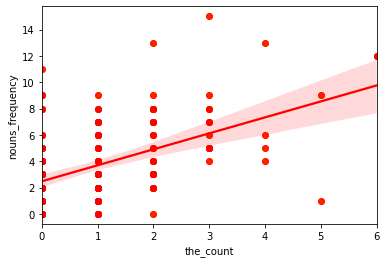

In [34]:
#Creating a scatterplot for the correlation 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Scatter plot
plt.scatter(corr_df['the_count'],corr_df['nouns_frequency'], c="orange")
plt.xlabel("the_count") # plot on the X axis
plt.ylabel("nouns_frequency") # plot on the Y axis
#draw the correlation line
plot_corr_sns = sns.regplot(x="the_count", y="nouns_frequency", color="r", data=corr_df.drop(['sentence', 'score', 'adjective_frequency'], axis=1))
plt.show() 

In [35]:
#the result is a positive linear relationship 
# Getting the correlation matrix for Pearson method
pearson = corr_df.drop(['score', 'adjective_frequency'], axis=1).corr(method="pearson")
pearson

,nouns_frequency,the_count
nouns_frequency,1.000000,0.502869
the_count,0.502869,1.000000


In [36]:
#The pearson coefficient is 0.50 and it means that the variables are monotonically increasing 
#because linear relationships are always monotonic. 
#This relationship is,linear monotonic moderate strength positive relationship. 
#When the count of the word "the" increases the noun frequency increases
#thereofre the Pearson method is best used for this correlation. 